In [842]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [843]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [844]:
%cd /content/drive/My Drive/atlas

/content/drive/My Drive/atlas


In [845]:
traffic = pd.read_csv('Unfallorte2020_LinRef.csv', sep=';', dtype={'ULAND': object, 'UKREIS': object, 'UGEMEINDE': object})

In [846]:
traffic

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND
0,1,1.220012e+19,12,0,68,468,2020,1,11,5,...,0,0,0,1,0,"735840,436700000430000","5887204,801599999900000","12,521519179000052","53,082132832000070",0
1,2,1.220011e+19,12,0,61,112,2020,1,17,2,...,1,1,0,0,0,"814106,991899999790000","5811960,550300000200000","13,614608653000062","52,367677682000078",0
2,3,1.220011e+19,12,0,67,144,2020,1,16,5,...,1,0,0,0,0,"845207,375699999740000","5811964,177100000900000","14,069661201000031","52,349021128000061",1
3,4,1.220013e+19,12,0,69,076,2020,1,11,6,...,1,0,0,0,0,"756844,833999999800000","5787696,062999999200000","12,757074839000040","52,179829995000034",1
4,5,1.220012e+19,12,0,62,224,2020,1,16,6,...,1,0,0,0,0,"793616,489599999970000","5735748,046199999700000","13,249132448000069","51,695730215000026",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237989,237990,7.201218e+18,07,1,38,045,2020,12,17,6,...,1,0,1,0,0,"391675,607900000180000","5589115,281999999700000","7,474374137000041","50,444042102000026",1
237990,237991,7.201205e+18,07,3,32,049,2020,12,8,7,...,1,0,0,0,0,"438750,044599999670000","5484883,899299999700000","8,153857415000061","49,513483991000044",1
237991,237992,7.201215e+18,07,1,41,075,2020,12,17,3,...,1,0,0,0,0,"400274,490199999880000","5575067,228599999100000","7,599165158000062","50,319263897000042",1
237992,237993,7.201120e+18,07,3,14,000,2020,11,7,6,...,1,1,0,0,0,"454090,255400000140000","5482031,062799999500000","8,366091643000061","49,489180504000046",0


In [847]:
ags = pd.read_excel('AGS_Liste.xlsx')

In [848]:
traffic.dtypes

OBJECTID         int64
UIDENTSTLAE    float64
ULAND           object
UREGBEZ          int64
UKREIS          object
UGEMEINDE       object
UJAHR            int64
UMONAT           int64
USTUNDE          int64
UWOCHENTAG       int64
UKATEGORIE       int64
UART             int64
UTYP1            int64
ULICHTVERH       int64
IstRad           int64
IstPKW           int64
IstFuss          int64
IstKrad          int64
IstGkfz          int64
IstSonstige      int64
LINREFX         object
LINREFY         object
XGCSWGS84       object
YGCSWGS84       object
STRZUSTAND       int64
dtype: object

In [849]:
traffic['ULAND'] = traffic['ULAND'].astype(str)

In [850]:
traffic['UREGBEZ'] = traffic['UREGBEZ'].astype(str)

In [851]:
traffic['UKREIS'] = traffic['UKREIS'].astype(str)

In [852]:
traffic['UGEMEINDE'] = traffic['UGEMEINDE'].astype(str)

In [853]:
traffic['AGS'] = traffic['ULAND'] + traffic['UREGBEZ'] + traffic['UKREIS'] + traffic['UGEMEINDE']

In [854]:
traffic['kreis_nr'] = traffic['ULAND'] + traffic['UREGBEZ'] + traffic['UKREIS']

In [855]:
traffic['region_nr'] = traffic['kreis_nr'].astype(str).str[:-1]

In [856]:
traffic

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND,AGS,kreis_nr,region_nr
0,1,1.220012e+19,12,0,68,468,2020,1,11,5,...,1,0,"735840,436700000430000","5887204,801599999900000","12,521519179000052","53,082132832000070",0,12068468,12068,1206
1,2,1.220011e+19,12,0,61,112,2020,1,17,2,...,0,0,"814106,991899999790000","5811960,550300000200000","13,614608653000062","52,367677682000078",0,12061112,12061,1206
2,3,1.220011e+19,12,0,67,144,2020,1,16,5,...,0,0,"845207,375699999740000","5811964,177100000900000","14,069661201000031","52,349021128000061",1,12067144,12067,1206
3,4,1.220013e+19,12,0,69,076,2020,1,11,6,...,0,0,"756844,833999999800000","5787696,062999999200000","12,757074839000040","52,179829995000034",1,12069076,12069,1206
4,5,1.220012e+19,12,0,62,224,2020,1,16,6,...,0,0,"793616,489599999970000","5735748,046199999700000","13,249132448000069","51,695730215000026",0,12062224,12062,1206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237989,237990,7.201218e+18,07,1,38,045,2020,12,17,6,...,0,0,"391675,607900000180000","5589115,281999999700000","7,474374137000041","50,444042102000026",1,07138045,07138,0713
237990,237991,7.201205e+18,07,3,32,049,2020,12,8,7,...,0,0,"438750,044599999670000","5484883,899299999700000","8,153857415000061","49,513483991000044",1,07332049,07332,0733
237991,237992,7.201215e+18,07,1,41,075,2020,12,17,3,...,0,0,"400274,490199999880000","5575067,228599999100000","7,599165158000062","50,319263897000042",1,07141075,07141,0714
237992,237993,7.201120e+18,07,3,14,000,2020,11,7,6,...,0,0,"454090,255400000140000","5482031,062799999500000","8,366091643000061","49,489180504000046",0,07314000,07314,0731


In [857]:
ags = ags.rename(columns = {'SCHLUESSEL': 'ags_nr'})
traffic = traffic.rename(columns = {'AGS': 'ags_nr'})

In [858]:
traffic['ags_nr'] = traffic['ags_nr'].astype(int)

In [859]:
traffic = traffic.merge(ags, on='ags_nr', how='left')

**Mapping der Werte / Übersetzung aus PDF**


*   ULAND
*   UKREIS
*   UGEMEINDE
*   UWOCHENTAG
*   UKATEGORIE
*   UART
*   UTYP1
*   ULICHTVERH
*   USTRZUSTAND



In [860]:
uland = [['01', 'Schleswig-Holstein'], ['02', 'Hamburg'], ['03', 'Niedersachsen'], ['04', 'Bremen'], ['05', 'Nordrhein-Westfalen'], ['06', 'Hessen'], ['07', 'Rheinland-Pfalz'], ['08', 'Baden-Württemberg'], ['09', 'Bayern'], ['10', 'Saarland'], ['11', 'Berlin'], ['12', 'Brandenburg'], ['13', 'Mecklenburg-Vorpommern'], ['14', 'Sachsen'], ['15', 'Sachsen-Anhalt'], ['16', 'Thüringen']]

In [861]:
uland_table = pd.DataFrame(uland, columns=['ULAND', 'ULAND_NAME'])

In [862]:
traffic = traffic.merge(uland_table, on='ULAND', how='left')

In [863]:
traffic = traffic.rename(columns = {'Bezeichnung': 'Gemeinde'})

-------------------------

In [864]:
wochentag = [['1', 'Sonntag'], ['2', 'Montag'], ['3', 'Dienstag'], ['4', 'Mittwoch'], ['5', 'Donnerstag'], ['6', 'Freitag'], ['7', 'Samstag']]

In [865]:
wochentag_table = pd.DataFrame(wochentag, columns=['UWOCHENTAG', 'Wochentag'])

In [866]:
wochentag_table['UWOCHENTAG'] = wochentag_table['UWOCHENTAG'].astype(int)

In [867]:
traffic = traffic.merge(wochentag_table, on='UWOCHENTAG', how='left')

---------

In [868]:
u_kategorie = [['1', 'Unfall mit Getöteten'], ['2', 'Unfall mit Schwerverletzten'], ['3', 'Unfall mit Leichtverletzten']]

In [869]:
u_kategorie_table = pd.DataFrame(u_kategorie, columns=['UKATEGORIE', 'Unfallkategorie'])

In [870]:
u_kategorie_table['UKATEGORIE'] = u_kategorie_table['UKATEGORIE'].astype(int)

In [871]:
traffic = traffic.merge(u_kategorie_table, on='UKATEGORIE', how='left')

-----------------

In [872]:
u_lichverhaeltnis = [['0', 'Tageslicht'], ['1', 'Dämmerung'], ['2', 'Dunkelheit']]

In [873]:
u_lichverhaeltnis_table = pd.DataFrame(u_lichverhaeltnis, columns=['ULICHTVERH', 'Lichtverhaeltnis'])

In [874]:
u_lichverhaeltnis_table['ULICHTVERH'] = u_lichverhaeltnis_table['ULICHTVERH'].astype(int)

In [875]:
traffic = traffic.merge(u_lichverhaeltnis_table, on='ULICHTVERH', how='left')

--------

In [876]:
u_strzustand = [['0', 'trocken'], ['1', 'nass'], ['2', 'winterglatt']]

In [877]:
u_strzustand_table = pd.DataFrame(u_strzustand, columns=['STRZUSTAND', 'Straßenzustand'])

In [878]:
u_strzustand_table['STRZUSTAND'] = u_strzustand_table['STRZUSTAND'].astype(int)

In [879]:
traffic = traffic.merge(u_strzustand_table, on='STRZUSTAND', how='left')

-------

**Filterung auf Baden-Württemberg:**

In [880]:
traffic_new = traffic

In [881]:
is_bawü = traffic_new['ULAND']=='08'

In [882]:
traffic_bawü = traffic_new[is_bawü]

In [883]:
regionen = [['0811', 'Region Stuttgart'], ['0812', 'Region Heilbronn-Franken'], ['0813', 'Region Ostwürttemberg'], ['0821', 'Region Mittlerer Oberrhein'], ['0822', 'Region Rhein-Neckar-Odenwald'], ['0823', 'Region Nordschwarzwald'], ['0831', 'Region Südlicher Oberrhein'], ['0832', 'Region Schwarzwald-Baar-Heuberg'], ['0833', 'Region Hochrhein-Bodensee'], ['0841', 'Region Neckar-Alb'], ['0842', 'Region Donau-Iller'], ['0843', 'Region Bodensee-Oberschwaben']]

In [884]:
regionen_table = pd.DataFrame(regionen, columns=['region_nr', 'Region'])

In [885]:
traffic_bawü = traffic_bawü.merge(regionen_table, on='region_nr', how='left')

In [886]:
traffic_bawü[['Gemeinde_Name', 'Gemeinde_Art']] = traffic_bawü.Gemeinde.str.split(',', expand=True)

In [887]:
list(traffic_bawü)

['OBJECTID',
 'UIDENTSTLAE',
 'ULAND',
 'UREGBEZ',
 'UKREIS',
 'UGEMEINDE',
 'UJAHR',
 'UMONAT',
 'USTUNDE',
 'UWOCHENTAG',
 'UKATEGORIE',
 'UART',
 'UTYP1',
 'ULICHTVERH',
 'IstRad',
 'IstPKW',
 'IstFuss',
 'IstKrad',
 'IstGkfz',
 'IstSonstige',
 'LINREFX',
 'LINREFY',
 'XGCSWGS84',
 'YGCSWGS84',
 'STRZUSTAND',
 'ags_nr',
 'kreis_nr',
 'region_nr',
 'Gemeinde',
 'ULAND_NAME',
 'Wochentag',
 'Unfallkategorie',
 'Lichtverhaeltnis',
 'Straßenzustand',
 'Region',
 'Gemeinde_Name',
 'Gemeinde_Art']

In [888]:
traffic_bawü = traffic_bawü.drop(columns=['OBJECTID', 'UIDENTSTLAE', 'UREGBEZ', 'UKREIS', 'UGEMEINDE', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84', 'Gemeinde'])

In [889]:
traffic_bawü.Gemeinde_Art.fillna(value='Gemeinde', inplace=True)

In [912]:
traffic_bawü

,ULAND,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,...,kreis_nr,region_nr,ULAND_NAME,Wochentag,Unfallkategorie,Lichtverhaeltnis,Straßenzustand,Region,Gemeinde_Name,Gemeinde_Art
0,08,2020,1,11,6,3,5,3,0,0,...,08225,0822,Baden-Württemberg,Freitag,Unfall mit Leichtverletzten,Tageslicht,nass,Region Rhein-Neckar-Odenwald,Buchen (Odenwald),Stadt
1,08,2020,1,14,5,3,9,1,0,0,...,08119,0811,Baden-Württemberg,Donnerstag,Unfall mit Leichtverletzten,Tageslicht,nass,Region Stuttgart,Waiblingen,Stadt
2,08,2020,1,3,4,3,8,1,2,0,...,08126,0812,Baden-Württemberg,Mittwoch,Unfall mit Leichtverletzten,Dunkelheit,nass,Region Heilbronn-Franken,Bretzfeld,Gemeinde
3,08,2020,1,7,6,2,4,6,2,0,...,08115,0811,Baden-Württemberg,Freitag,Unfall mit Schwerverletzten,Dunkelheit,nass,Region Stuttgart,Magstadt,Gemeinde
4,08,2020,1,16,4,3,8,1,1,0,...,08417,0841,Baden-Württemberg,Mittwoch,Unfall mit Leichtverletzten,Dämmerung,winterglatt,Region Neckar-Alb,Meßstetten,Stadt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28445,08,2020,12,14,4,3,5,2,0,1,...,08335,0833,Baden-Württemberg,Mittwoch,Unfall mit Leichtverletzten,Tageslicht,nass,Region Hochrhein-Bodensee,Singen (Hohentwiel),Stadt
28446,08,2020,12,17,2,3,8,7,2,0,...,08212,0821,Baden-Württemberg,Montag,Unfall mit Leichtverletzten,Dunkelheit,nass,Region Mittlerer Oberrhein,Karlsruhe,Stadt
28447,08,2020,12,18,3,3,0,1,2,1,...,08315,0831,Baden-Württemberg,Dienstag,Unfall mit Leichtverletzten,Dunkelheit,nass,Region Südlicher Oberrhein,Breisach am Rhein,Stadt
28448,08,2020,12,23,4,3,8,7,2,0,...,08125,0812,Baden-Württemberg,Mittwoch,Unfall mit Leichtverletzten,Dunkelheit,nass,Region Heilbronn-Franken,Weinsberg,Stadt


IstRad: numerische Analyse der Fahrrad-Unfälle

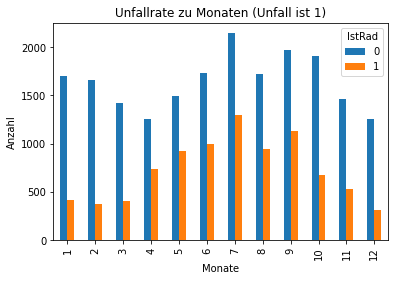

In [890]:
u_rad_monat = pd.crosstab(traffic_bawü["UMONAT"], traffic_bawü["IstRad"])
u_rad_monat.plot(kind='bar')
plt.ylabel('Anzahl')
plt.xlabel('Monate')
plt.title('Unfallrate zu Monaten (Unfall ist 1)')
plt.show()

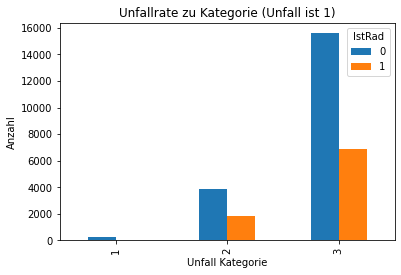

In [891]:
u_rad_kategorie = pd.crosstab(traffic_bawü["UKATEGORIE"], traffic_bawü["IstRad"])
u_rad_kategorie.plot(kind='bar')
plt.ylabel('Anzahl')
plt.xlabel('Unfall Kategorie')
plt.title('Unfallrate zu Kategorie (Unfall ist 1)')
plt.show()

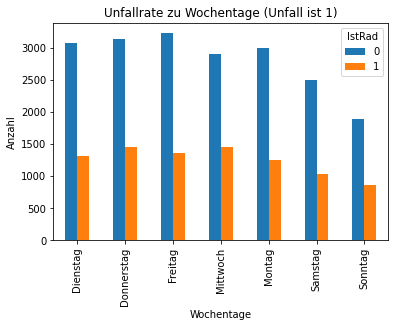

In [892]:
u_rad_wochentag = pd.crosstab(traffic_bawü["Wochentag"], traffic_bawü["IstRad"])
u_rad_wochentag.plot(kind='bar')
plt.ylabel('Anzahl')
plt.xlabel('Wochentage')
plt.title('Unfallrate zu Wochentage (Unfall ist 1)')
plt.show()

In [893]:
Fahrrad = sum(traffic_bawü.IstRad == 1)
PKW = sum(traffic_bawü.IstPKW == 1)
Fuss = sum(traffic_bawü.IstFuss == 1)
Motorrad = sum(traffic_bawü.IstKrad == 1)
LKW = sum(traffic_bawü.IstGkfz == 1)
Sonstige = sum(traffic_bawü.IstSonstige == 1)

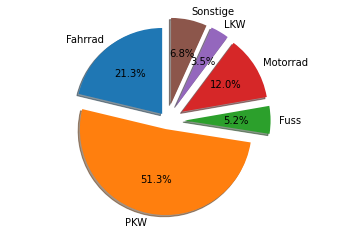

In [894]:
labels = 'Fahrrad', 'PKW', 'Fuss', 'Motorrad', 'LKW', 'Sonstige'
sizes = [Fahrrad, PKW, Fuss, Motorrad, LKW, Sonstige]
explode = (0.1, 0.1, 0.2, 0.2, 0.2, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [895]:
traffic_bawü.dtypes

ULAND               object
UJAHR                int64
UMONAT               int64
USTUNDE              int64
UWOCHENTAG           int64
UKATEGORIE           int64
UART                 int64
UTYP1                int64
ULICHTVERH           int64
IstRad               int64
IstPKW               int64
IstFuss              int64
IstKrad              int64
IstGkfz              int64
IstSonstige          int64
STRZUSTAND           int64
ags_nr               int64
kreis_nr            object
region_nr           object
ULAND_NAME          object
Wochentag           object
Unfallkategorie     object
Lichtverhaeltnis    object
Straßenzustand      object
Region              object
Gemeinde_Name       object
Gemeinde_Art        object
dtype: object

Text(0.5, 1.0, 'Unfälle pro Wochentag')

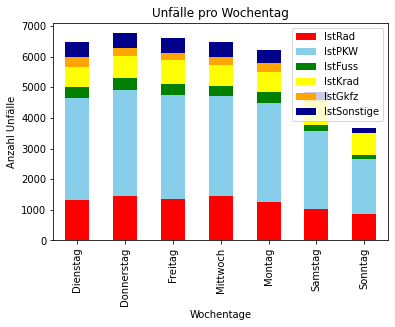

In [896]:
df_wochentag = traffic_bawü.groupby('Wochentag').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_wochentag.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Wochentage')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Wochentag')

Text(0.5, 1.0, 'Unfälle pro Monat')

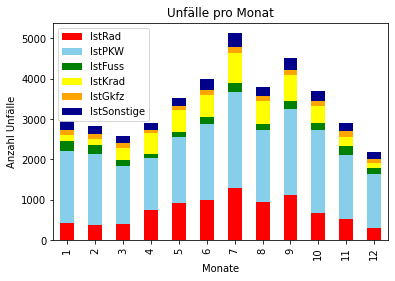

In [897]:
df_monat = traffic_bawü.groupby('UMONAT').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_monat.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Monate')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Monat')

Text(0.5, 1.0, 'Unfälle pro Stunde')

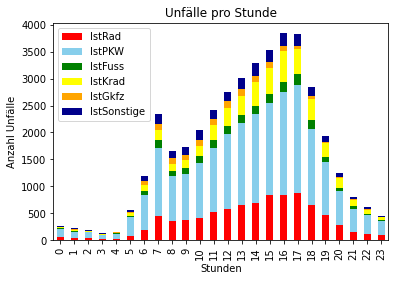

In [898]:
df_stunde = traffic_bawü.groupby('USTUNDE').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_stunde.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Stunden')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Stunde')

Text(0.5, 1.0, 'Unfälle pro Unfall Art')

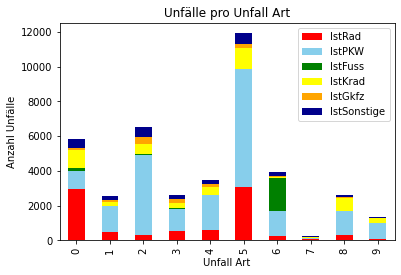

In [899]:
df_art = traffic_bawü.groupby('UART').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_art.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Unfall Art')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Unfall Art')

Text(0.5, 1.0, 'Unfälle pro Unfall Typ')

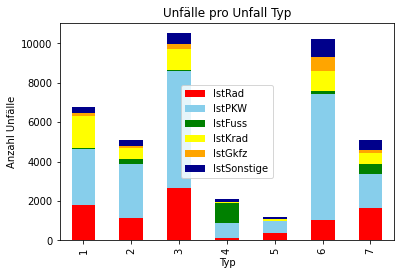

In [900]:
df_typ = traffic_bawü.groupby('UTYP1').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_typ.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Typ')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Unfall Typ')

Text(0.5, 1.0, 'Unfälle pro Bundesland')

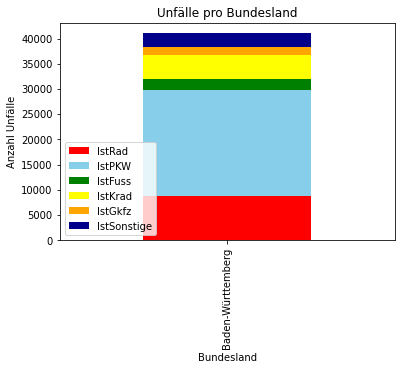

In [901]:
df_land = traffic_bawü.groupby('ULAND_NAME').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_land.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Bundesland')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Bundesland')

Text(0.5, 1.0, 'Unfälle pro Kategorie')

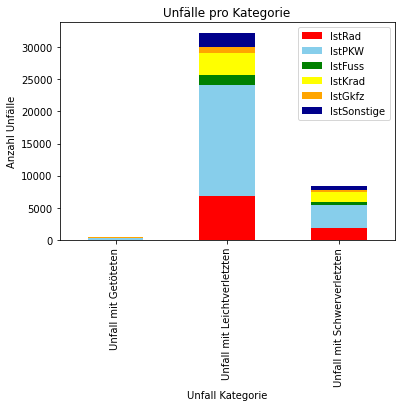

In [902]:
df_kategorie = traffic_bawü.groupby('Unfallkategorie').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_kategorie.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Unfall Kategorie')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Kategorie')

Text(0.5, 1.0, 'Unfälle pro Lichtverhaeltnis')

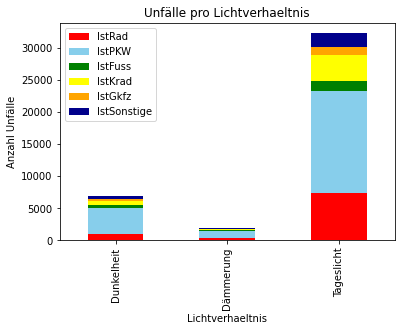

In [903]:
df_licht = traffic_bawü.groupby('Lichtverhaeltnis').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_licht.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Lichtverhaeltnis')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Lichtverhaeltnis')

Text(0.5, 1.0, 'Unfälle pro Straßenzustand')

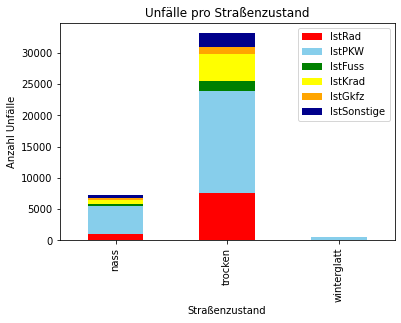

In [904]:
df_strzustand = traffic_bawü.groupby('Straßenzustand').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_strzustand.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Straßenzustand')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Straßenzustand')

Text(0.5, 1.0, 'Unfälle pro Region')

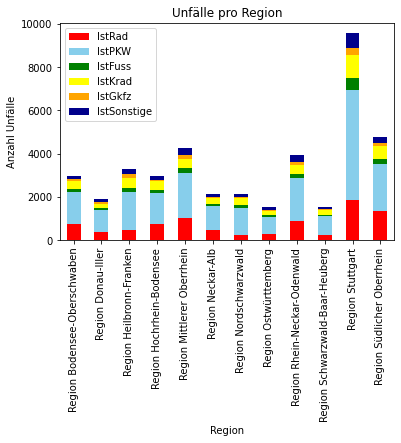

In [905]:
df_region = traffic_bawü.groupby('Region').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_region.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Region')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Region')

Text(0.5, 1.0, 'Unfälle pro Gemeinde Art')

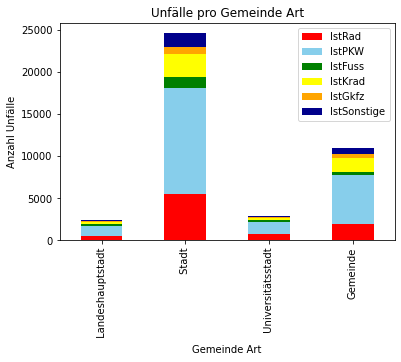

In [909]:
df_gemeinde_art = traffic_bawü.groupby('Gemeinde_Art').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_gemeinde_art.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Gemeinde Art')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Gemeinde Art')

Text(0.5, 1.0, 'Unfälle pro Gemeinde')

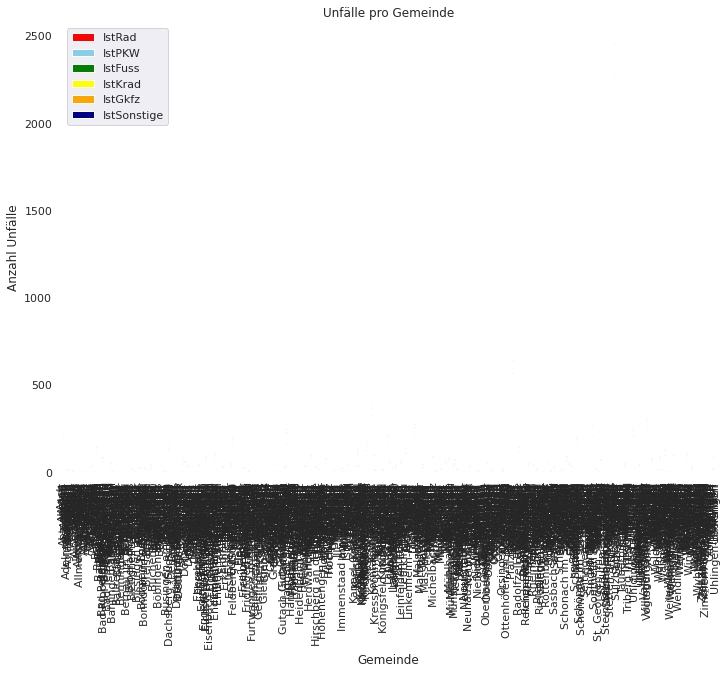

In [913]:
df_gemeinde = traffic_bawü.groupby('Gemeinde_Name').sum()[['IstRad', 'IstPKW','IstFuss','IstKrad', 'IstGkfz', 'IstSonstige']]
df_gemeinde.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'orange', 'darkblue'])
 
plt.xlabel('Gemeinde')
plt.ylabel('Anzahl Unfälle')
 
plt.title('Unfälle pro Gemeinde')